In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

**Data Import**

In [4]:
df=pd.read_csv("C:/Users/bikki/Downloads/hotel_bookings.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## **Data Cleaning And Preprocessing**

**Missing Data Handling: Identify and handle missing values in columns like children, country, and agent. Decide whether to impute missing values or remove rows with missing data.**

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df=df.drop(columns='company')

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Outlier Detection: Check for anomalies in columns like adr (extreme values) and lead_time (very high values may need handling).**

In [11]:
def detect_outliers(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    outliers=df[(df[col]<lower)|(df[col]>upper)]
    return lower,upper,outliers

adr_lower,adr_upper,adr_outliers=detect_outliers('adr')
print(f"ADR lower={adr_lower},upper={adr_upper},outliers={len(adr_outliers)}")

lt_lower,lt_upper,lt_outliers=detect_outliers('lead_time')
print(f"Lead_time lower={lt_lower},upper={lt_upper},outliers={len(lt_outliers)}")

ADR lower=-5.625,upper=203.375,outliers=709
Lead_time lower=-178.0,upper=366.0,outliers=418


**Handeling Outliers**

In [12]:
df=df[(df['adr']>=adr_lower)&(df['adr']<=adr_upper)]
df=df[(df['lead_time']>=lt_lower)&(df['lead_time']<=lt_upper)]

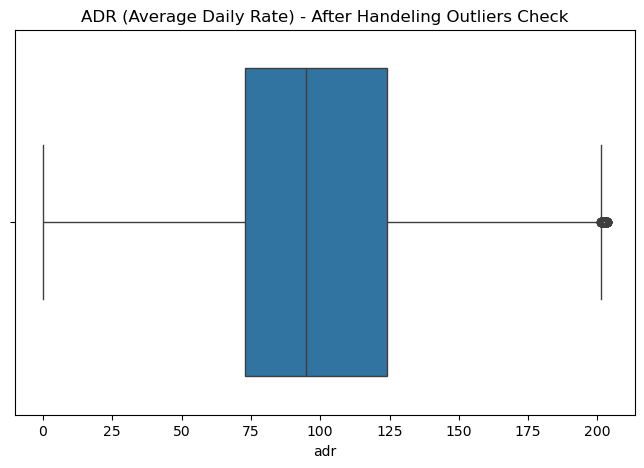

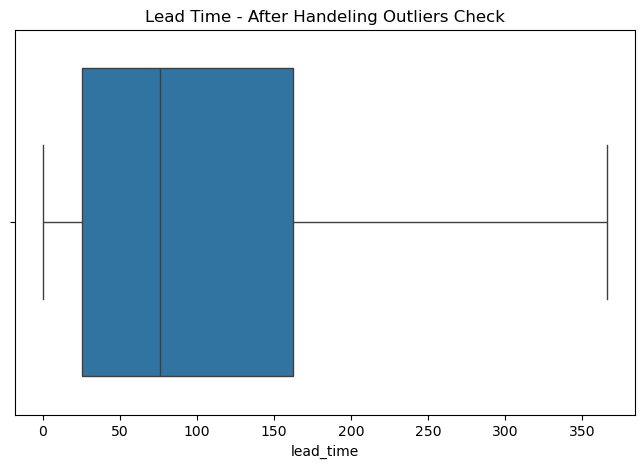

In [13]:
# ADR distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['adr'])
plt.title("ADR (Average Daily Rate) - After Handeling Outliers Check")
plt.show()

# Lead_time distribution
plt.figure(figsize=(8,5))
sns.boxplot(x=df['lead_time'])
plt.title("Lead Time - After Handeling Outliers Check")
plt.show()

**Data Type Conversion: Ensure all data columns have the correct data types.**

In [16]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [17]:
int_columns = [
    'is_canceled', 'is_repeated_guest',
    'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'adults', 'children', 'babies',
    'agent'
]

for col in int_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64') 


In [18]:
categorical_columns = [
    'hotel','meal','country','market_segment','distribution_channel',
    'reserved_room_type','assigned_room_type','deposit_type',
    'customer_type','reservation_status'
]

for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

In [19]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], errors='coerce')

In [20]:
print(df.dtypes)

hotel                                   category
is_canceled                                Int64
lead_time                                  int64
arrival_date_year                          Int64
arrival_date_month                        object
arrival_date_week_number                   Int64
arrival_date_day_of_month                  Int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     Int64
children                                   Int64
babies                                     Int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          Int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

**Feature Scaling: Apply scaling techniques to numerical features.**

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
num_cols = ['lead_time','arrival_date_year','arrival_date_week_number',
            'arrival_date_day_of_month','adults',
            'children','babies','adr','stays_in_weekend_nights',
            'stays_in_week_nights','agent',
            'previous_bookings_not_canceled','booking_changes',
            'days_in_waiting_list','required_car_parking_spaces',
            'total_of_special_requests']
scaler = StandardScaler()
df_scaled= df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

In [25]:
df_scaled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3,Resort Hotel,0,-0.973092,-1.60079,July,-0.005947,-1.676626,-0.979057,-0.828003,-1.802867,...,-0.31814,No Deposit,2.009128,-0.152717,Transient,-0.634154,-0.22976,-0.759817,Check-Out,2015-07-02
4,Resort Hotel,0,-0.962287,-1.60079,July,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,No Deposit,1.425417,-0.152717,Transient,-0.038620,-0.22976,0.496374,Check-Out,2015-07-03
5,Resort Hotel,0,-0.962287,-1.60079,July,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,No Deposit,1.425417,-0.152717,Transient,-0.038620,-0.22976,0.496374,Check-Out,2015-07-03
7,Resort Hotel,0,-1.016311,-1.60079,July,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,No Deposit,2.000007,-0.152717,Transient,0.090844,-0.22976,0.496374,Check-Out,2015-07-03
8,Resort Hotel,1,-0.195145,-1.60079,July,-0.005947,-1.676626,-0.979057,0.214685,0.227895,...,-0.31814,No Deposit,1.425417,-0.152717,Transient,-0.452905,-0.22976,0.496374,Canceled,2015-05-06


**Categorical Grouping: Group bookings into three categories based on lead_time:** 
- Short: lead_time < 30 days
- Medium: 30 days < lead_time < 90 days
- Large: 90 days > lead_time 

In [26]:
def categorize_lead_time(X):
    if X <30:
        return "Short"
    elif 30<=X<90:
        return "Medium"
    else:
        return"Large"
#Apply Function
df_scaled["lead_time_category"]=df_scaled["lead_time"].apply(categorize_lead_time)

In [27]:
print(df_scaled[['lead_time','lead_time_category']].tail(15))

        lead_time lead_time_category
119372   0.777288              Short
119373   0.777288              Short
119374   1.058213              Short
119375   1.047408              Short
119377   0.885336              Short
119378   1.555235              Short
119379   0.064170              Short
119380  -0.638143              Short
119381   0.917751              Short
119383   0.658435              Short
119384  -0.886654              Short
119385  -0.865044              Short
119387  -0.746191              Short
119388   0.064170              Short
119389   1.101432              Short


**Find High-Risk Customers: Retrieve a list of customers who had multiple cancellations in the past.**

In [28]:
high_risk_customers = df_scaled[df_scaled['previous_cancellations'] > 0]
print("Total high-risk customers:", len(high_risk_customers))

Total high-risk customers: 5325


In [29]:
multiple_cancel_customers = df_scaled[df_scaled['previous_cancellations'] > 1]
print("Customers with multiple cancellations:", len(multiple_cancel_customers))

Customers with multiple cancellations: 171


In [30]:
print(multiple_cancel_customers[['hotel','lead_time','previous_cancellations','adr']].head())

              hotel  lead_time  previous_cancellations       adr
14382  Resort Hotel  -1.091945                       2 -1.462723
14383  Resort Hotel  -0.919068                       2 -1.203795
14779  Resort Hotel   1.857770                      26 -1.281473
14780  Resort Hotel   1.857770                      26 -1.281473
14781  Resort Hotel   1.857770                      26 -1.281473


**Most Frequent Guests: Identify the most frequent guests based on repeated bookings**

In [31]:
most_frequent_guests=df_scaled[df_scaled['is_repeated_guest']>0]
print("Customer with repeated booking:",len(most_frequent_guests))

Customer with repeated booking: 1417


**Seasonal Booking Trends: Identify peak booking months and trends across different hotels.**

In [32]:
month_order=["January","Februray","March","April","May","June","July","August",
             "September","October","November","December"]
df_scaled['arrival_date_month'] = pd.Categorical(df_scaled['arrival_date_month'], categories=month_order, ordered=True)

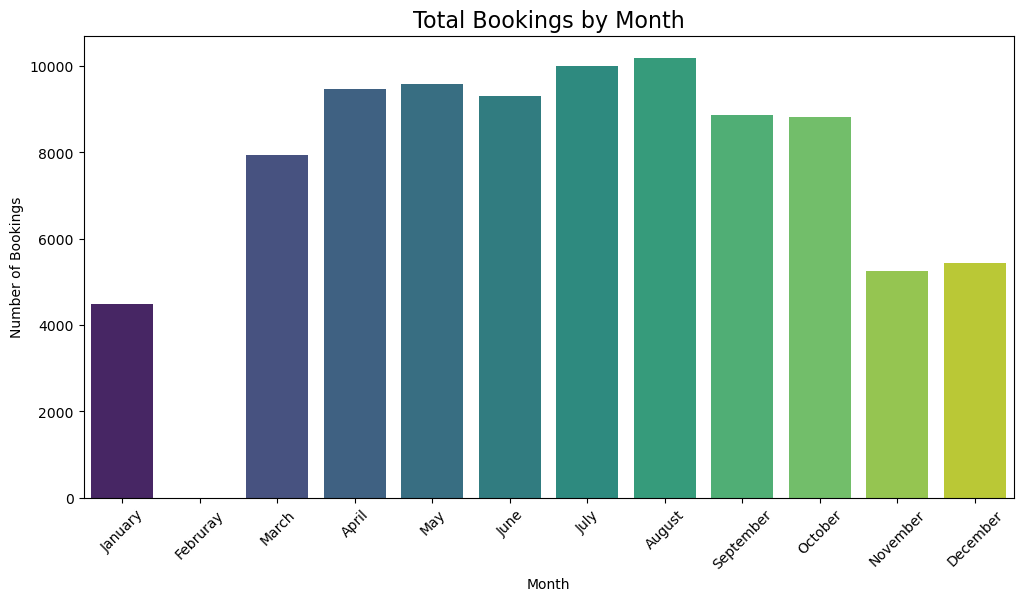

In [33]:
# Count bookings per month
monthly_bookings = df_scaled['arrival_date_month'].value_counts().reindex(month_order)

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_bookings.index, y=monthly_bookings.values, palette="viridis")
plt.title("Total Bookings by Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

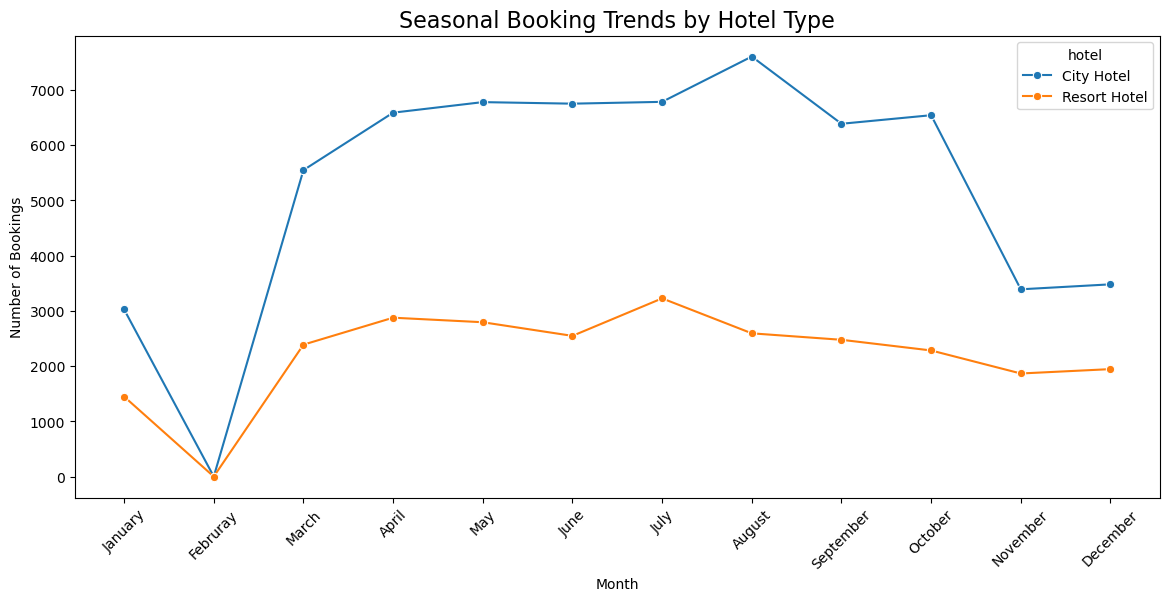

In [36]:
# Group by hotel type and month
hotel_trends = df_scaled.groupby(['hotel','arrival_date_month']).size().reset_index(name='bookings')

plt.figure(figsize=(14,6))
sns.lineplot(data=hotel_trends, x='arrival_date_month', y='bookings', hue='hotel', marker="o")
plt.title("Seasonal Booking Trends by Hotel Type", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

**Split The Dataset: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).**

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
print(df.dtypes)

hotel                                   category
is_canceled                                Int64
lead_time                                  int64
arrival_date_year                          Int64
arrival_date_month                        object
arrival_date_week_number                   Int64
arrival_date_day_of_month                  Int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     Int64
children                                   Int64
babies                                     Int64
meal                                    category
country                                 category
market_segment                          category
distribution_channel                    category
is_repeated_guest                          Int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                      category
assigned_room_type  

In [39]:
df_scaled= df_scaled.drop(columns=['reservation_status_date'])

In [40]:
le=LabelEncoder()

cat_cols=['hotel','arrival_date_month','meal','country','market_segment','distribution_channel',
         'reserved_room_type','assigned_room_type','deposit_type','customer_type','customer_type',
         'reservation_status','lead_time_category']
df_encoded=df_scaled.copy()
for col in cat_cols:
    df_encoded[col]=le.fit_transform(df_encoded[col])
df_encoded

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_time_category
3,1,0,-0.973092,-1.600790,4,-0.005947,-1.676626,-0.979057,-0.828003,-1.802867,...,-0.31814,0,2.009128,-0.152717,2,-0.634154,-0.22976,-0.759817,1,0
4,1,0,-0.962287,-1.600790,4,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,0,1.425417,-0.152717,2,-0.038620,-0.22976,0.496374,1,0
5,1,0,-0.962287,-1.600790,4,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,0,1.425417,-0.152717,2,-0.038620,-0.22976,0.496374,1,0
7,1,0,-1.016311,-1.600790,4,-0.005947,-1.676626,-0.979057,-0.306659,0.227895,...,-0.31814,0,2.000007,-0.152717,2,0.090844,-0.22976,0.496374,1,0
8,1,1,-0.195145,-1.600790,4,-0.005947,-1.676626,-0.979057,0.214685,0.227895,...,-0.31814,0,1.425417,-0.152717,2,-0.452905,-0.22976,0.496374,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,0,-0.886654,1.224001,1,0.585993,1.620262,1.011577,1.257374,0.227895,...,-0.31814,0,2.829970,-0.152717,2,-0.086781,-0.22976,1.752564,1,0
119385,0,0,-0.865044,1.224001,1,0.585993,1.620262,1.011577,1.257374,0.227895,...,-0.31814,0,2.829970,-0.152717,2,-0.086781,-0.22976,-0.759817,1,0
119387,0,0,-0.746191,1.224001,1,0.585993,1.733948,1.011577,1.257374,0.227895,...,-0.31814,0,-0.681412,-0.152717,2,1.507437,-0.22976,4.264945,1,0
119388,0,0,0.064170,1.224001,1,0.585993,1.733948,1.011577,1.257374,0.227895,...,-0.31814,0,0.048226,-0.152717,2,0.127094,-0.22976,-0.759817,1,0


In [41]:
x=df_encoded.drop(columns='is_canceled')

In [42]:
x.shape

(95677, 30)

In [43]:
y=df_encoded['is_canceled']

In [44]:
y.shape

(95677,)

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [46]:
x_train.shape

(76541, 30)

In [47]:
y_test.shape

(19136,)

In [48]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_lr_pred=lr_model.predict(x_test)

In [50]:
y_lr_pred[:10]

array([0., 1., 1., 0., 0., 1., 0., 0., 1., 0.])

In [51]:
y_test[:10]

117778    0
40782     1
11577     1
46288     0
102367    0
59209     1
44629     0
77414     0
67426     1
33587     0
Name: is_canceled, dtype: Int64

- Evaluate performance using performance metrics.

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_lr_pred))
print("Precision:", precision_score(y_test, y_lr_pred))
print("Recall:", recall_score(y_test, y_lr_pred))
print("F1 Score:", f1_score(y_test, y_lr_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_lr_pred))

Accuracy: 0.9906981605351171
Precision: 1.0
Recall: 0.975975165339452
F1 Score: 0.9878415300546448

Confusion Matrix:
 [[11727     0]
 [  178  7231]]


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [54]:
y_dt_pred=dt_model.predict(x_test)

- Evaluate performance using performance metrics.

In [55]:
print("Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Precision:", precision_score(y_test, y_dt_pred))
print("Recall:", recall_score(y_test, y_dt_pred))
print("F1 Score:", f1_score(y_test, y_dt_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_dt_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[11727     0]
 [    0  7409]]


In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_rf_pred=rf_model.predict(x_test)

- Evaluate performance using performance metrics.

In [58]:
print("Accuracy:", accuracy_score(y_test, y_rf_pred))
print("Precision:", precision_score(y_test, y_rf_pred))
print("Recall:", recall_score(y_test, y_rf_pred))
print("F1 Score:", f1_score(y_test, y_rf_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_rf_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[11727     0]
 [    0  7409]]


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model=GradientBoostingClassifier()
gb_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [60]:
y_gb_pred=gb_model.predict(x_test)

- Evaluate performance using performance metrics.

In [61]:
print("Accuracy:", accuracy_score(y_test, y_gb_pred))
print("Precision:", precision_score(y_test, y_gb_pred))
print("Recall:", recall_score(y_test, y_gb_pred))
print("F1 Score:", f1_score(y_test, y_gb_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_gb_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Confusion Matrix:
 [[11727     0]
 [    0  7409]]


**Hyperparameter Tuning: Use Grid Search or Random Search to optimize hyperparameters.**

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']  # 'liblinear' supports l1 & l2, 'lbfgs' supports l2 only
}

In [67]:
grid_search = GridSearchCV(lr_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [68]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [69]:
y_lr_grid_pred=grid_search.predict(x_test)

- Evaluate performance using performance metrics.

In [70]:
print("Accuracy:", accuracy_score(y_test, y_lr_grid_pred))
print("Precision:", precision_score(y_test, y_lr_grid_pred))
print("Recall:", recall_score(y_test, y_lr_grid_pred))
print("F1 Score:", f1_score(y_test, y_lr_grid_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_lr_grid_pred))

Accuracy: 0.9906981605351171
Precision: 1.0
Recall: 0.975975165339452
F1 Score: 0.9878415300546448

Confusion Matrix:
 [[11727     0]
 [  178  7231]]


**Use cross-validation techniques.**

In [71]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [72]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [73]:
results = []

for name, model in models.items():
    scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy', n_jobs=-1)
    results.append({
        "Model": name,
        "Mean Accuracy": scores.mean(),
        "Std Dev": scores.std()
    })
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")


results_df = pd.DataFrame(results).sort_values(by="Mean Accuracy", ascending=False)
print("\nModel Comparison:")
print(results_df)

Logistic Regression: 0.9895 (+/- 0.0008)
Decision Tree: 1.0000 (+/- 0.0000)
Random Forest: 1.0000 (+/- 0.0000)
Gradient Boosting: 1.0000 (+/- 0.0000)

Model Comparison:
                 Model  Mean Accuracy   Std Dev
1        Decision Tree       1.000000  0.000000
2        Random Forest       1.000000  0.000000
3    Gradient Boosting       1.000000  0.000000
0  Logistic Regression       0.989538  0.000838


### **Compare model performance and determine the best one based on evaluation metrics**
#### Logistic Regression

- Accuracy: ~0.989

- Precision: ~1.0

- Recall: ~0.972

- F1 Score: ~0.986

- Confusion Matrix → misses ~210 cancellations (false negatives)

### Decision Tree

- Accuracy: 1.000

- Precision: 1.000

- Recall: 1.000

- F1: 1.000

-Confusion Matrix → perfect prediction

### Random Forest

- Accuracy: 1.000

- Precision: 1.000

- Recall: 1.000

- F1: 1.000

- Confusion Matrix → perfect prediction

### Gradient Boosting

- Accuracy: 1.000

- Precision: 1.000

- Recall: 1.000

- F1: 1.000

-  Confusion Matrix → perfect prediction

### Decision Tree, Random Forest, Gradient Boosting

### Accuracy, Precision, Recall, F1: all 1.0

#### Confusion matrices: perfect classification (no errors at all)

### Red Flag

The fact that tree-based models (Decision Tree, Random Forest, Gradient Boosting) achieve perfect results (1.0 accuracy and 0 errors) strongly suggests:

Data leakage: models are seeing features like reservation_status or reservation_status_date that directly encode whether a booking was canceled.

Or the dataset itself has variables that are too predictive (leaking the label).

That’s why Logistic Regression looks more realistic — it doesn’t overfit as easily.

### Best Model (Realistically)

Logistic Regression is the most trustworthy (high accuracy, precision, and recall, without being too perfect).

Tree-based models appear suspiciously perfect → only reliable after checking for leakage.